In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob
from helpers import *

In [2]:
filenames = glob.glob('../Data/Test016/*.tif')
filenames.sort()

images = [cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in filenames]

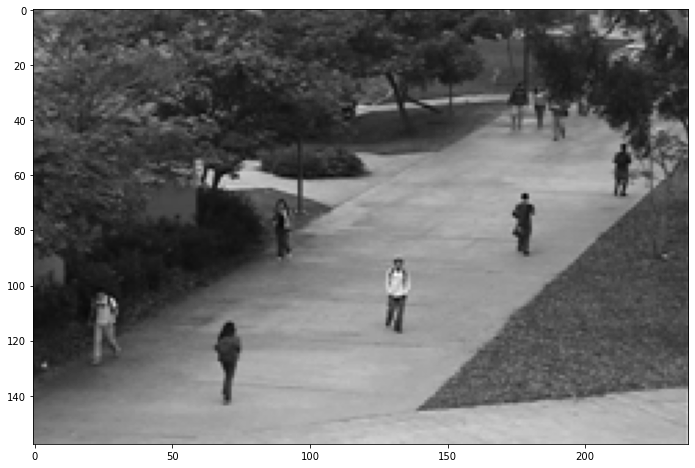

In [3]:
background_image = images[0]

plt.imshow(background_image, cmap='gray')

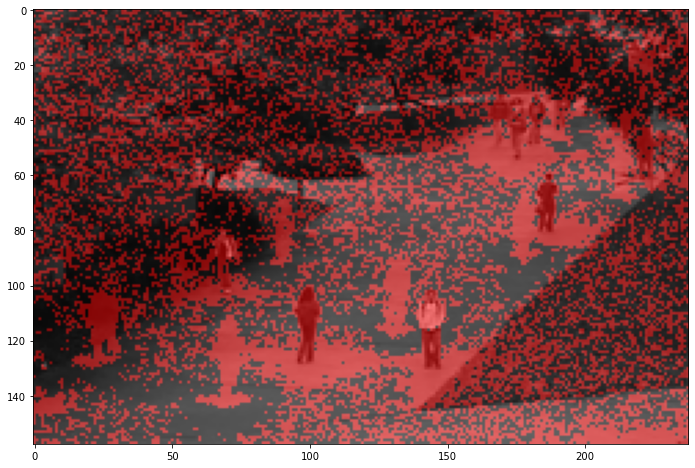

In [10]:
IMAGE_ID = 30
T = 10

image = images[IMAGE_ID].copy()

foreground = np.abs(image - background_image)
foreground_mask = cv2.inRange(foreground, T, 255).astype(np.uint8)

image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
red_mask = np.stack([foreground_mask, np.zeros_like(foreground_mask), np.zeros_like(foreground_mask)], axis=2)
image = cv2.addWeighted(image, 0.5, red_mask, 0.5, 0)

plt.imshow(image)
